In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [47]:
# Load and Prepare Data
data = pd.read_csv('MORTH DATA/Model_3_dataset.csv')

# Separate features and target
target = 'Total_Persons_Killed'
features = [col for col in data.columns if col not in [target, 'YEAR', 'National_Highways', 'State_Highways', 'Urban', 'Rural']]

X = data[features]
y = data[target]

# Natural log transformation for scaling
X_scaled = np.log(X)
y_scaled = np.log(y)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

## Correlation Heatmap

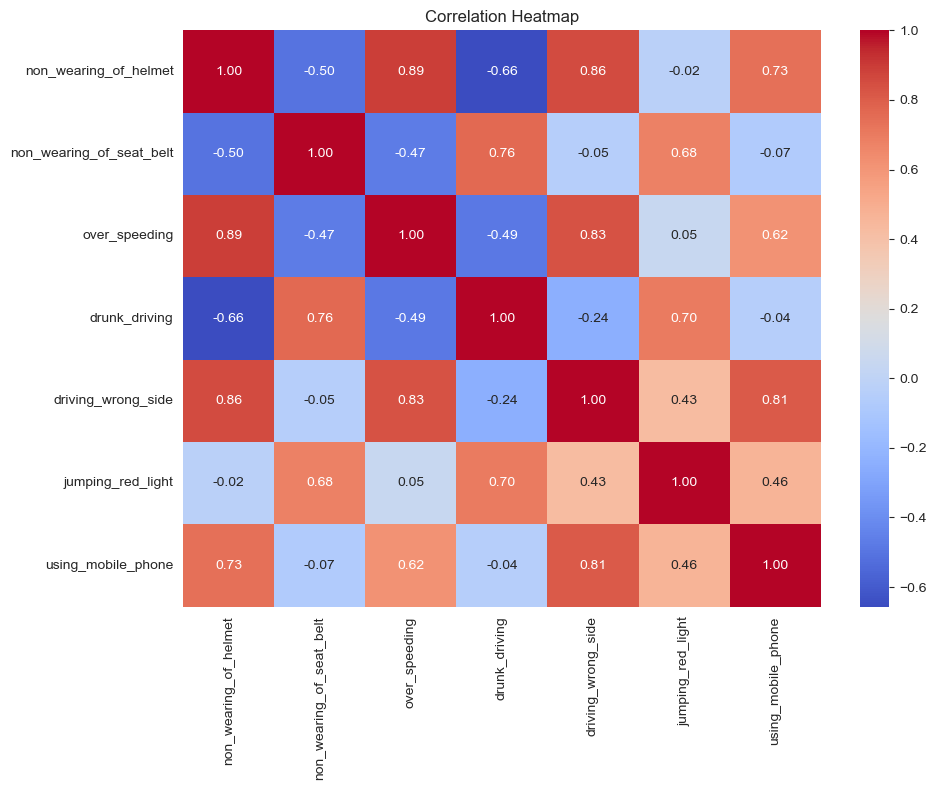

In [48]:
# --------------------------------------
# Correlation Heatmap
# --------------------------------------

# Specify columns to normalize
columns_to_normalize = [
    col for col in data.columns if col not in [
        'YEAR', 'Total_Persons_Killed', 'National_Highways', 
        'State_Highways', 'Urban', 'Rural'
    ]
]

# Apply natural log normalization to selected columns
data[columns_to_normalize] = np.log(data[columns_to_normalize])

# Create a correlation heatmap to visualize relationships
plt.figure(figsize=(10,8))
corr_matrix = data[columns_to_normalize].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Linear Regression Model

Linear Regression RMSE: 0.11677660883528755
Linear Regression R^2: -3.348208724201969
Linear Regression Coefficients:
                    Feature  Coefficient
2             over_speeding     0.925560
1  non_wearing_of_seat_belt     0.689859
6        using_mobile_phone     0.289332
3             drunk_driving     0.094291
0     non_wearing_of_helmet    -0.142819
4        driving_wrong_side    -0.236125
5         jumping_red_light    -0.332468


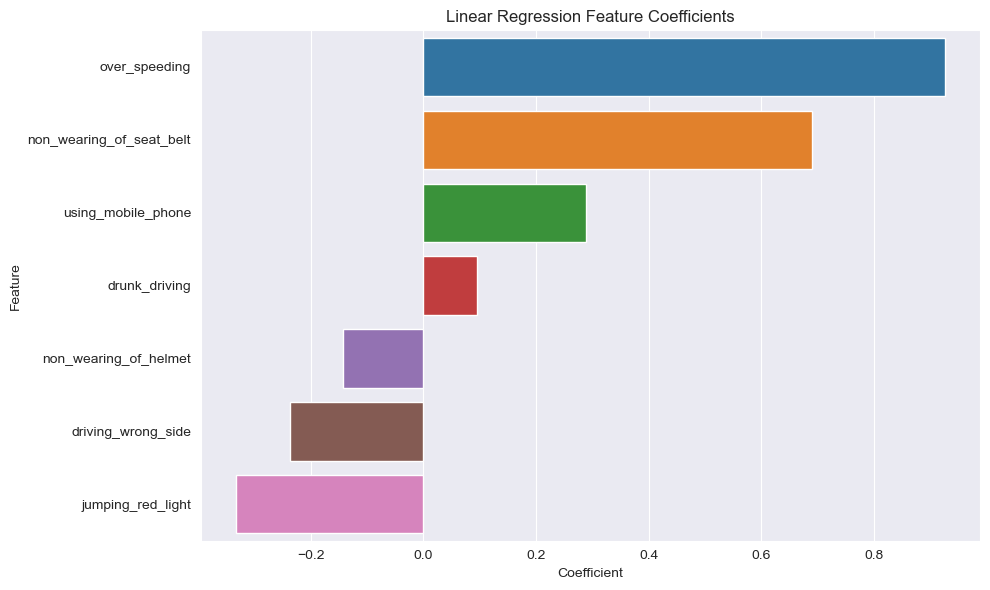

In [49]:
# --------------------------------------
# Linear Regression Model
# --------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2:", lr_r2)

# Extracting coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lin_reg.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)
print("Linear Regression Coefficients:")
print(coefficients)

# Plot coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, orient='h')
plt.title('Linear Regression Feature Coefficients')
plt.tight_layout()
plt.show()

## Random Forest Regressor

Random Forest RMSE: 0.03211431219528955
Random Forest R^2: 0.6711514627035717
Random Forest Feature Importances:
                    Feature  Importance
1  non_wearing_of_seat_belt    0.211287
5         jumping_red_light    0.204916
3             drunk_driving    0.171167
6        using_mobile_phone    0.158075
2             over_speeding    0.110342
0     non_wearing_of_helmet    0.108884
4        driving_wrong_side    0.035329


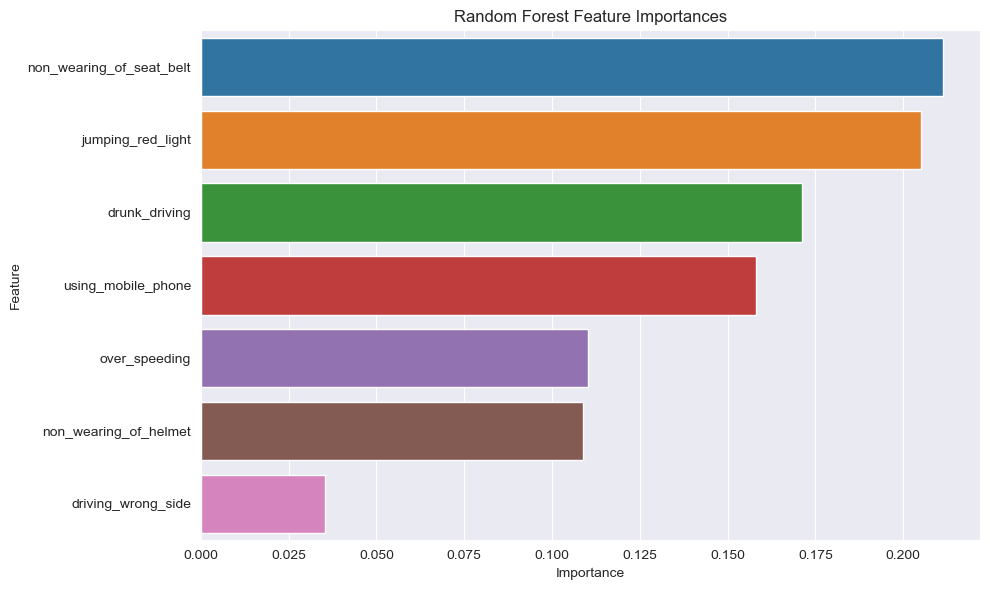

In [50]:
# --------------------------------------
# Random Forest Regressor
# --------------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2:", rf_r2)

# Feature Importances for Random Forest
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
})
importances = importances.sort_values('Importance', ascending=False)
print("Random Forest Feature Importances:")
print(importances)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances, orient='h')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

## Gradient Boosting Regressor (GB) Model

Gradient Boosting RMSE: 0.08052443670120354
Gradient Boosting R^2: -1.0675406423488023


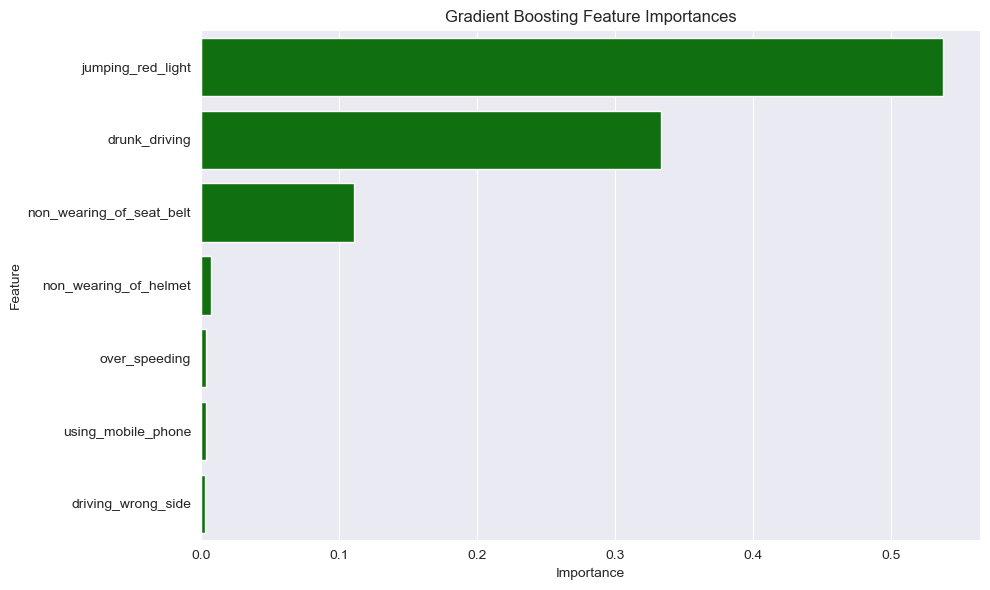

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = r2_score(y_test, y_pred_gb)
print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting R^2:", gb_r2)

# GB Feature importance
gb_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=gb_importances, orient='h', color='green')
plt.title('Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()

# --------------------------------------
# Interpretation & Next Steps
# --------------------------------------
# Look at the correlation matrix, coefficients, and feature importances to understand
# which factors have the greatest impact on Total_Persons_Killed.
#
# Next steps could include:
# - Hyperparameter tuning of the Random Forest or Gradient Boosting model.
# - Using regularization (Ridge/Lasso) for the linear model to reduce overfitting.
# - Exploring time series modeling if YEAR plays a bigger role (e.g., use ARIMA or LSTM if you have data over many years).
# - Using SHAP values or partial dependence plots for deeper model interpretation.


## Lasso and Ridge

In [57]:
from sklearn.linear_model import Ridge, Lasso

# --------------------------------------
# Ridge Regression
# --------------------------------------
# Tune alpha to a suitable value. Higher alpha -> more regularization.
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2:", ridge_r2)

ridge_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge.coef_
}).sort_values('Coefficient', ascending=False)

print("Ridge Coefficients:")
print(ridge_coefficients)

# --------------------------------------
# Lasso Regression
# --------------------------------------
# Similarly, tune alpha. If alpha is too high, coefficients will be heavily shrunk towards zero.
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print("RMSE:", lasso_rmse)
print("R^2:", lasso_r2)

lasso_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', ascending=False)

print("Lasso Coefficients:")
print(lasso_coefficients)

# --------------------------------------
# Optional: Plot Coefficients for Visual Comparison
# --------------------------------------



Ridge Regression RMSE: 0.04401077761992864
Ridge Regression R^2: 0.38238654503376757
Ridge Coefficients:
                    Feature  Coefficient
5         jumping_red_light     0.062572
1  non_wearing_of_seat_belt     0.054630
3             drunk_driving     0.041894
6        using_mobile_phone     0.009420
4        driving_wrong_side     0.008717
2             over_speeding    -0.000430
0     non_wearing_of_helmet    -0.037096

Lasso Regression:
RMSE: 0.06259614587958333
R^2: -0.24937799479365075
Lasso Coefficients:
                    Feature  Coefficient
0     non_wearing_of_helmet         -0.0
1  non_wearing_of_seat_belt          0.0
2             over_speeding         -0.0
3             drunk_driving          0.0
4        driving_wrong_side          0.0
5         jumping_red_light          0.0
6        using_mobile_phone          0.0


In [53]:
X_scaled

,non_wearing_of_helmet,non_wearing_of_seat_belt,over_speeding,drunk_driving,driving_wrong_side,jumping_red_light,using_mobile_phone
0,10.820358,9.724062,11.694447,8.343078,9.115370,7.287561,8.130059
1,10.749206,9.704854,11.582787,8.105911,9.002332,6.520621,8.000349
2,10.586307,9.625492,11.421238,8.108322,8.900004,6.761573,7.978311
3,10.706968,9.946786,11.530009,8.580168,9.127067,7.493874,8.506132
4,10.683133,10.103772,11.488510,8.339979,9.078408,7.342779,8.217978
5,10.490580,10.199733,11.498958,8.471359,9.161885,7.509883,8.062118
6,9.223750,10.151831,11.210414,8.721113,8.649098,7.138867,7.667626
